In [92]:
# like excel
import pandas as pd
# for visulization
import seaborn as sns

In [93]:
#read a file into dataframe
telco_data =  pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/Telco-Customer-Churn.csv')
telco_data.shape

(5070, 21)

In [94]:
#standard pandas viewer
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [95]:
#show df info
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5070 entries, 0 to 5069
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5070 non-null   object 
 1   gender            5070 non-null   object 
 2   SeniorCitizen     5070 non-null   int64  
 3   Partner           5070 non-null   object 
 4   Dependents        5070 non-null   object 
 5   tenure            5070 non-null   int64  
 6   PhoneService      5070 non-null   object 
 7   MultipleLines     5070 non-null   object 
 8   InternetService   5070 non-null   object 
 9   OnlineSecurity    5070 non-null   object 
 10  OnlineBackup      5070 non-null   object 
 11  DeviceProtection  5070 non-null   object 
 12  TechSupport       5070 non-null   object 
 13  StreamingTV       5070 non-null   object 
 14  StreamingMovies   5070 non-null   object 
 15  Contract          5070 non-null   object 
 16  PaperlessBilling  5070 non-null   object 


#Cross tab
Create a "contingency table" showing relationship between 2 or more columns

In [96]:
#show counts, margin=True shows totals as well
pd.crosstab(telco_data.gender, [telco_data.Churn, telco_data.PaperlessBilling], margins=True)

Churn               No        Yes        All
PaperlessBilling    No   Yes   No  Yes      
gender                                      
Female             835   999  178  495  2507
Male               906   998  158  501  2563
All               1741  1997  336  996  5070

In [97]:
#show percents with "normalize"
# round to 2 digit
cross_table=pd.crosstab(telco_data.gender, [telco_data.Churn], normalize=True).round(2)
cross_table

Churn,No,Yes
gender,,
Female,0.36,0.13
Male,0.38,0.13


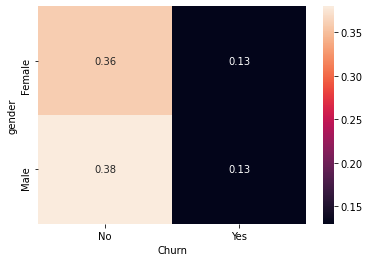

In [98]:
#visualzie as a heatmap
#annot true show values
sns.heatmap(cross_table, annot=True)

# Group By

In [99]:
telco_data.groupby(by='gender')['MonthlyCharges'].mean()

gender
Female    65.204188
Male      64.317031
Name: MonthlyCharges, dtype: float64

In [100]:
#multiple column
telco_data.groupby(['InternetService','gender'])['MonthlyCharges'].mean().round(2)

InternetService  gender
DSL              Female    58.96
                 Male      57.96
Fiber optic      Female    91.58
                 Male      91.46
No               Female    21.15
                 Male      21.10
Name: MonthlyCharges, dtype: float64

In [101]:
#get multiple results
telco_data.groupby(['InternetService','gender']).agg({'MonthlyCharges':['mean','median','count']})

MonthlyCharges              
                                 mean  median count
InternetService gender                             
DSL             Female      58.961315  58.350   844
                Male        57.960955  55.525   890
Fiber optic     Female      91.582915  91.150  1115
                Male        91.460244  92.525  1108
No              Female      21.147080  20.150   548
                Male        21.099735  20.150   565

# Covert to Numeric

In [102]:
example_number = '10'
type(example_number)

str

In [103]:
converted_nums = pd.to_numeric(example_number)
type(converted_nums)

numpy.int64

In [104]:
telco_data.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [105]:
#coerce force remove, covert to NaN in this case
telco_data.TotalCharges=pd.to_numeric(telco_data.TotalCharges, errors='coerce')

In [106]:
#how many were coerced?
telco_data.TotalCharges.isna().sum()

8

# Replace

In [107]:
telco_data.PaperlessBilling = telco_data.PaperlessBilling.replace({'Yes':1, 'No':0, 'Santa':100})

In [108]:
telco_data.PaperlessBilling.value_counts()

1    2993
0    2077
Name: PaperlessBilling, dtype: int64

# Timestamps

In [109]:
telco_data['last_updated'] = '2021-04-23'
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5070 entries, 0 to 5069
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5070 non-null   object 
 1   gender            5070 non-null   object 
 2   SeniorCitizen     5070 non-null   int64  
 3   Partner           5070 non-null   object 
 4   Dependents        5070 non-null   object 
 5   tenure            5070 non-null   int64  
 6   PhoneService      5070 non-null   object 
 7   MultipleLines     5070 non-null   object 
 8   InternetService   5070 non-null   object 
 9   OnlineSecurity    5070 non-null   object 
 10  OnlineBackup      5070 non-null   object 
 11  DeviceProtection  5070 non-null   object 
 12  TechSupport       5070 non-null   object 
 13  StreamingTV       5070 non-null   object 
 14  StreamingMovies   5070 non-null   object 
 15  Contract          5070 non-null   object 
 16  PaperlessBilling  5070 non-null   int64  


In [110]:
telco_data['month'] = pd.DatetimeIndex(telco_data.last_updated).month
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,last_updated,month
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,No,2021-04-23,4
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,No,2021-04-23,4
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,Yes,2021-04-23,4
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,No,2021-04-23,4
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,Yes,2021-04-23,4


In [111]:
telco_data['year'] = pd.DatetimeIndex(telco_data.last_updated).year
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,last_updated,month,year
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,No,2021-04-23,4,2021
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,No,2021-04-23,4,2021
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,Yes,2021-04-23,4,2021
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,No,2021-04-23,4,2021
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,Yes,2021-04-23,4,2021


# Pivot

In [112]:
#just pivot with no aggregation. For each customerId what is monthly charge for each type of Internet service?
telco_data.pivot(index='customerID', columns='InternetService', values='MonthlyCharges')

InternetService,DSL,Fiber optic,No
customerID,,,
0002-ORFBO,65.60,NaN,NaN
0003-MKNFE,59.90,NaN,NaN
0004-TLHLJ,NaN,73.9,NaN
0013-MHZWF,69.40,NaN,NaN
0013-SMEOE,NaN,109.7,NaN
...,...,...,...
9987-LUTYD,55.15,NaN,NaN
9992-RRAMN,NaN,85.1,NaN
9992-UJOEL,50.30,NaN,NaN


In [113]:
#pivot table with sum
telco_data.pivot_table(index='gender', columns='InternetService', values='MonthlyCharges', aggfunc='mean').round(2)

InternetService,DSL,Fiber optic,No
gender,,,
Female,58.96,91.58,21.15
Male,57.96,91.46,21.10


# Melt
"unpivot"
Turn columns into rows
https://www.dataindependent.com/pandas/pandas-melt/

In [121]:
telco_data.melt(id_vars='PaymentMethod')

,PaymentMethod,variable,value
0,Electronic check,customerID,7590-VHVEG
1,Mailed check,customerID,5575-GNVDE
2,Mailed check,customerID,3668-QPYBK
3,Bank transfer (automatic),customerID,7795-CFOCW
4,Electronic check,customerID,9237-HQITU
...,...,...,...
116605,Bank transfer (automatic),year,2021
116606,Bank transfer (automatic),year,2021
116607,Bank transfer (automatic),year,2021
116608,Bank transfer (automatic),year,2021
